In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')

In [2]:
from faces_clustering import Clusterer, FeatureExtractor, is_image, get_files_folder

Using TensorFlow backend.


## Getting Face Urls

In [3]:
train_urls = get_files_folder('/home/paulo/Imagens/telemidia_faces', criteria=is_image)

## Clustering

In [4]:
clusterer = Clusterer(backbone = 'senet50',n_clusters=4, urls = train_urls,
                      algs=['kmeans', 'affinity', 'agglomerative'])

In [5]:
df_clusters, models = clusterer.clusterize()

In [6]:
df_clusters

,urls,embeddings,cluster_kmeans,cluster_affinity,cluster_agglomerative
0,/home/paulo/Imagens/telemidia_faces/paulo.jpeg,"[0.39360145, 1.934995, 0.020749738, 0.00227505...",2,1,1
1,/home/paulo/Imagens/telemidia_faces/busson2.jpg,"[0.06358877, 10.183159, 1.1475965, 0.002632501...",1,0,2
2,/home/paulo/Imagens/telemidia_faces/alan.jpeg,"[0.07129636, 0.45440188, 0.12062798, 0.0014702...",3,0,3
3,/home/paulo/Imagens/telemidia_faces/paulo3.jpg,"[6.961411, 0.0063533382, 0.03464496, 0.0026545...",2,1,1
4,/home/paulo/Imagens/telemidia_faces/arthur.jpg,"[0.060384337, 0.0017683001, 0.017961841, 0.021...",0,2,0
5,/home/paulo/Imagens/telemidia_faces/paulo2.jpeg,"[5.6964207, 0.11141217, 0.0011405005, 1.903164...",2,1,1
6,/home/paulo/Imagens/telemidia_faces/arthur2.jpeg,"[0.043833684, 0.101712294, 0.051434275, 0.0791...",0,2,0
7,/home/paulo/Imagens/telemidia_faces/busson.jpeg,"[0.04206134, 9.83545, 0.05491935, 0.09857785, ...",1,0,2


In [7]:
models

{'cluster_kmeans': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 'cluster_affinity': AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                     damping=0.5, max_iter=200, preference=None, verbose=False),
 'cluster_agglomerative': AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                         connectivity=None, distance_threshold=None,
                         linkage='ward', memory=None, n_clusters=4)}

## Tagging

In [7]:
import matplotlib.pyplot as plt
import cv2

In [8]:
dict_cluster_people = {}
clusters = df_clusters.cluster_agglomerative.unique()
samples_per_cluster = 5

Cluster 1: 


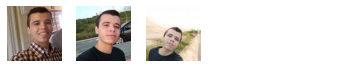

Cluster 2: 


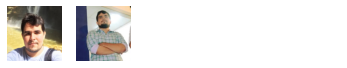

Cluster 3: 


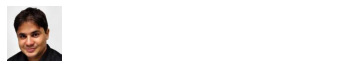

Cluster 0: 


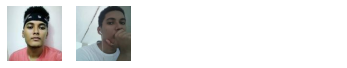

In [9]:
for cluster in clusters:
    print(f"Cluster {cluster}: ")
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 1))
    urls = df_clusters.loc[df_clusters.cluster_agglomerative == cluster].head(samples_per_cluster).urls
    [axi.set_axis_off() for axi in axes.ravel()]
    for i, url in enumerate(urls):
        axes[i].imshow(cv2.imread(url)[:,:,::-1])
        #axes[i].axis('off')
    plt.show()

In [10]:
dict_cluster_people[1] = 'Paulo'
dict_cluster_people[2] = 'Busson'
dict_cluster_people[3] = 'Alan'
dict_cluster_people[0] = 'Arthur'

df_clusters['classes'] = df_clusters.cluster_agglomerative.map(dict_cluster_people)

In [11]:
df_clusters

,urls,embeddings,cluster_kmeans,cluster_affinity,cluster_agglomerative,classes
0,/home/paulo/Imagens/telemidia_faces/paulo.jpeg,"[0.39360145, 1.934995, 0.020749738, 0.00227505...",2,1,1,Paulo
1,/home/paulo/Imagens/telemidia_faces/busson2.jpg,"[0.06358877, 10.183159, 1.1475965, 0.002632501...",1,0,2,Busson
2,/home/paulo/Imagens/telemidia_faces/alan.jpeg,"[0.07129636, 0.45440188, 0.12062798, 0.0014702...",3,0,3,Alan
3,/home/paulo/Imagens/telemidia_faces/paulo3.jpg,"[6.961411, 0.0063533382, 0.03464496, 0.0026545...",2,1,1,Paulo
4,/home/paulo/Imagens/telemidia_faces/arthur.jpg,"[0.060384337, 0.0017683001, 0.017961841, 0.021...",0,2,0,Arthur
5,/home/paulo/Imagens/telemidia_faces/paulo2.jpeg,"[5.6964207, 0.11141217, 0.0011405005, 1.903164...",2,1,1,Paulo
6,/home/paulo/Imagens/telemidia_faces/arthur2.jpeg,"[0.043833684, 0.101712294, 0.051434275, 0.0791...",0,2,0,Arthur
7,/home/paulo/Imagens/telemidia_faces/busson.jpeg,"[0.04206134, 9.83545, 0.05491935, 0.09857785, ...",1,0,2,Busson


## Searching Image

In [12]:
from faces_clustering import FaceSearcher, display_image
searcher = FaceSearcher(face_embs = df_clusters, classes_col = 'classes')

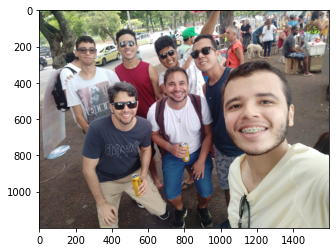

In [13]:
filename = '../tests/carnaval.jpeg'
display_image(filename)

In [14]:
faces, results = searcher.closest_centroids(filename)

In [25]:
softmax = lambda x: np.exp(x)/sum(np.exp(x))
def m1(x, k):
    m1 = softmax((1/x).nlargest(k))
    return m1

classes
Paulo     0.349179
Busson    0.327805
Arthur    0.323016
dtype: float64


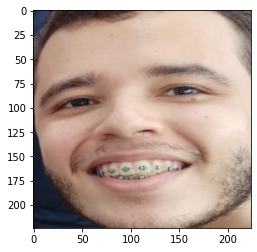

classes
Alan      0.333845
Busson    0.333231
Arthur    0.332924
dtype: float64


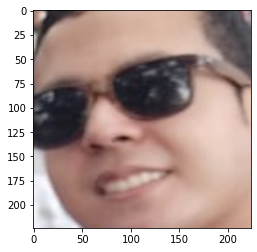

classes
Alan      0.333412
Arthur    0.333296
Paulo     0.333293
dtype: float64


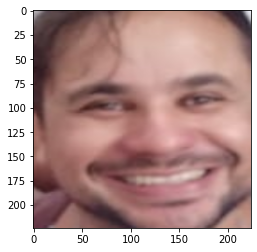

classes
Alan      0.333334
Arthur    0.333333
Busson    0.333333
dtype: float64


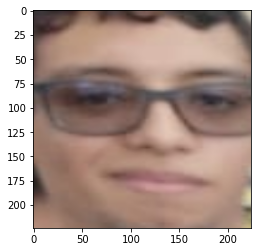

classes
Arthur    0.333355
Alan      0.333326
Busson    0.333319
dtype: float64


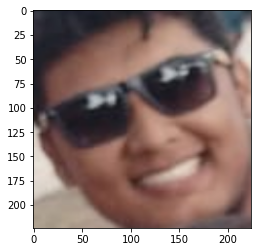

classes
Alan      0.333353
Arthur    0.333350
Paulo     0.333298
dtype: float64


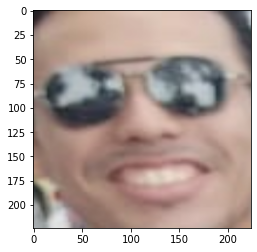

classes
Alan      0.333590
Busson    0.333226
Arthur    0.333184
dtype: float64


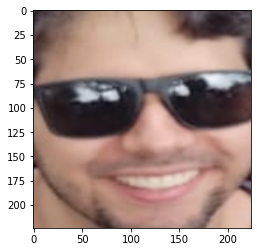

classes
Alan      0.333336
Arthur    0.333333
Busson    0.333331
dtype: float64


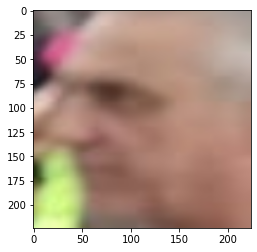

classes
Busson    0.333336
Alan      0.333333
Arthur    0.333331
dtype: float64


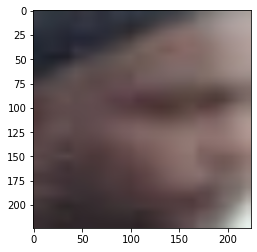

classes
Arthur    0.333552
Alan      0.333522
Busson    0.332926
dtype: float64


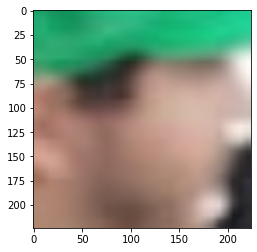

In [26]:
#fig, axes = plt.subplots(nrows=1, ncols=len(faces), figsize=(12, 1))
#[axi.set_axis_off() for axi in axes.ravel()]
for i,(face, r) in enumerate(zip(faces, results)):
    plt.imshow(face)
    print(m1(r,3))
    plt.show()